2 norms of the outputs
||y1||2: 5.83
||y2||2: 4.47
||y3||2: 7.28
||y4||2: 1.0
||y5||2: 0.28

Minimum Gain: 0.27
Maximum Gain: 7.34

Minimum Input directions: [[-0.608]
 [-0.794]]
Maximum Input directions: [[-0.794]
 [ 0.608]]


C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

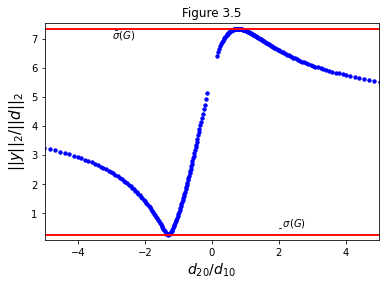

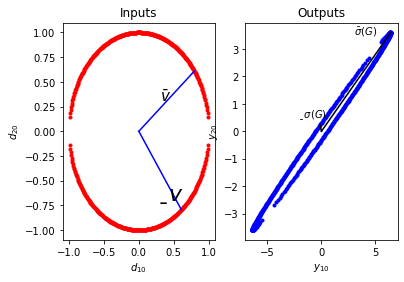

In [7]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = np.matrix([[1], [0]])
d2 = np.matrix([[0], [1]])
d3 = np.matrix([[0.707], [0.707]])
d4 = np.matrix([[0.707], [-0.707]])
d5 = np.matrix([[0.6], [-0.8]])

G = np.matrix([[5, 4], [3, 2]])

y1 = G*d1
y2 = G*d2
y3 = G*d3
y4 = G*d4
y5 = G*d5

print("2 norms of the outputs")
print("||y1||2:", np.round(np.linalg.norm(y1), 2))
print("||y2||2:", np.round(np.linalg.norm(y2), 2))
print("||y3||2:", np.round(np.linalg.norm(y3), 2))
print("||y4||2:", np.round(np.linalg.norm(y4), 2))
print("||y5||2:", np.round(np.linalg.norm(y5), 2))

# SVD decomposition
[U, S, T] = np.linalg.svd(G)
SVD = np.matrix(S)

print("")
print("Minimum Gain:", np.round(np.matrix.min(SVD), 2))
print("Maximum Gain:", np.round(np.matrix.max(SVD), 2))

print("")
print("Minimum Input directions:", np.round(T[:,-1], 3))
print("Maximum Input directions:", np.round(T[:,0], 3))

# first function is to create the unit circle
def Unit_circle():
    x = np.linspace(-0.99, 0.99, 300)
    y1 = np.sqrt(1-x**2)
    y2 = -1*np.sqrt(1-x**2)

    x_vec, y_vec = np.zeros(2*len(x)), np.zeros(2*len(x))
    x_vec[0:len(x)] = x
    y_vec[0:len(x)] = y1
    x_vec[len(x):] = x
    y_vec[len(x):] = y2

    return x_vec, y_vec

[d1, d2] = Unit_circle()

# generating the plot in figure 3.5 and figure 3.6

for i in range(len(d1)):
    d = np.matrix([[d1[i]], [d2[i]]])
    y_out = G*d
    y_axis = np.sqrt(y_out[0]**2+y_out[1]**2)/np.sqrt(d1[i]**2+d2[i]**2)
    x_axis = d2[i]/d1[i]
    plt.figure(1)
    plt.title('Figure 3.5')
    plt.plot(x_axis, y_axis, 'b.')
    plt.axis([-5, 5, np.matrix.min(SVD)-0.2, np.matrix.max(SVD)+0.2])
    plt.xlabel(r'$d_{20}/d_{10}$', fontsize=14)
    plt.ylabel(r'$||y||_2/||d||_2$', fontsize=15)

    plt.figure(2)
    plt.subplot(121)
    plt.plot(d1[i], d2[i], 'r.')

    plt.subplot(122)
    plt.plot(y_out[0], y_out[1], 'b.')

plt.figure(1)
plt.axhline(np.matrix.min(SVD),color='red')
plt.axhline(np.matrix.max(SVD),color='red')
plt.text(-3,np.matrix.max(SVD)-0.35,r'$\bar \sigma (G)$')
plt.text(2,np.matrix.min(SVD)+0.25,r'$\underbar{\sigma} (G)$')
plt.axhline(np.matrix.min(SVD), color='red')
plt.axhline(np.matrix.max(SVD), color='red')

# plotting of the vectors for the largest gain and smallest gain
plt.figure(2)
plt.subplot(121)
plt.plot([0, -T[0, 0]], [0, -T[0, 1]], 'b-')
plt.plot([0, T[1, 0]], [0, T[1, 1]], 'b-')
plt.text(0.3, 0.3, r'$\bar v$', fontsize=15)
plt.text(0.3, -0.7, r'$\underbar{v}$', fontsize=22)
plt.title('Inputs')
plt.xlabel(r'$d_{10}$')
plt.ylabel(r'$d_{20}$')

plt.subplot(122)
plt.title('Outputs')
plt.xlabel(r'$y_{10}$')
plt.ylabel(r'$y_{20}$') 
plt.plot([0, -U[0, 0]*np.matrix.max(SVD)], [0, -U[0, 1]*np.matrix.max(SVD)], 'k-')
plt.plot([0, U[1, 0]*np.matrix.min(SVD)], [0, U[1, 1]*np.matrix.min(SVD)], 'k-')
plt.text(3,3.5,r'$\bar \sigma (G)$')
plt.text(-2,0.5,r'$\underbar{\sigma} (G)$')
plt.ylabel(r'$y_{20}$')

plt.show()
